In [2]:
def function(x):
    y = x ** 2
    return y

def differential(x, dx):
    dy = (function(x + dx) - function(x)) / dx
    return dy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [8]:
#関数生成
x_list = np.arange(-10, 11)
y_list = function(x_list)
num = len(x_list)

#パラメータ設定
dx = 0.1 #刻み値
iter = 200 #繰り返し回数

#初期値設定
x = -10

#繰り返し処理
list_plot = []
fig = plt.figure()
for t in range(iter):
    #導関数を導出
    dy = differential(x, dx)
    #x,yを更新
    x = x - np.sign(dy) * dx
    y = function(x)
    #グラフを描画
    img = plt.plot(x, y, marker = '.', color = "red", markersize = 20)
    img += plt.plot(x_list, y_list, color = "black")
    list_plot.append(img)
    
#グラフ（アニメーション）描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval = 200, repeat_delay = 100)
rc('animation', html='jshtml')
plt.close()
anim

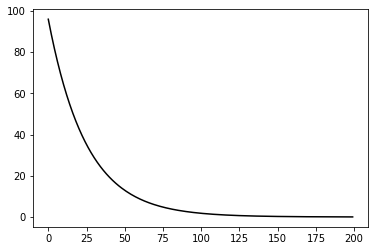

In [9]:
#パラメータ設定
delta = 0.01 #刻み値（学習率）
iter = 200 #繰り返し回数

#初期値設定
x = -10

#繰り返し処理
list_plot = []
series_y = []
fig = plt.figure()
for t in range(iter):
    #導関数を導出
    dy = differential(x, dx)
    #x,yを更新
    x = x - delta*dy
    y = function(x)
    series_y.append(y)
    
#グラフを描画
plt.plot(series_y, c = "k")

In [2]:
def function(X, y, alpha, beta):
    cost = (1 / (2 * m)) * np.sum((beta + alpha * X - y) ** 2)
    return cost

def differential_alpha(X, y, alpha, beta, delta):
    d_cost = (function(X, y, alpha + delta, beta) - function(X, y, alpha, beta)) / delta
    return d_cost

def differential_beta(X, y, alpha, beta, delta):
    d_cost = (function(X, y, alpha, beta + delta,) - function(X, y, alpha, beta)) / delta
    return d_cost

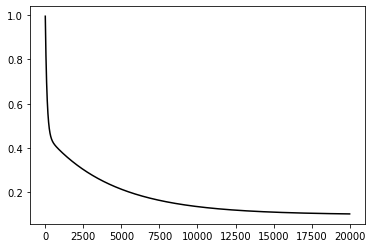

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#データ読み込み
df_sample = pd.read_csv("sample_linear.csv")
sample = df_sample.values.T

#変数を設定
X = sample[0]
y = sample[1]

#パラメータ設定
delta = 0.001 #刻み幅（学習率）
iter = 20000 #繰り返し回数

#初期値設定
alpha = 1
beta = 1

#繰り返し処理
cost = np.zeros(iter)
da = np.zeros(iter)
m = len(y)
for i in range(iter):
    
    #導関数を導出
    d_alpha = differential_alpha(X, y, alpha, beta, delta)
    d_beta = differential_beta(X, y, alpha, beta, delta)
    
    #alpha, beta, costを更新
    alpha = alpha - delta * d_alpha
    beta = beta - delta * d_beta
    cost[i] = function(X, y, alpha, beta)
    da[i] = alpha
    
#グラフを描画
plt.plot(da, c = "k")

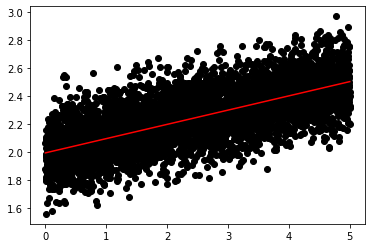

In [5]:
plt.scatter(sample[0], sample[1], c = "k")
plt.plot(X, beta + alpha * X, color = "red")
plt.show()